<a href="https://colab.research.google.com/github/Hayeon101/deep-learning-basic/blob/main/03/03_01_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80%EC%99%80_%EC%9E%90%EB%8F%99_%EB%AF%B8%EB%B6%84_(Linear_Regression_and_Autograd).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

## 1. 데이터에 대한 이해 (Data Definition)

### 1) 훈련 데이터셋과 테스트 데이터셋

예측을 위해 사용하는 데이터를 훈련 데이터셋 (training dataset)이라 한다.

### 2) 훈련 데이터셋의 구성

In [2]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

## 2. 가설 (Hypothesis) 수립

머신러닝에서 세우는 식을 가설 (Hypothesis) 이라고 합니다.

선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일입니다.

y = Wx + b 또는 H(x) = Wx+ b

W : 가중치 (Weight)
b : 편향 (bias)

## 3. 비용 함수 (Cost function) 에 대한 이해

비용 함수 = 손실 함수 = 오차 함수 = 목적 함수

cost function = loss function = error function = objective function

어떤 직선이 가장 적절한 직선인지 수학적으로 표현하기 위해 오차 (error)라는 개념을 도입합니다.

오차 (error) 는 실제값과 예측값의 차이입니다.
그러나 오차는 음수가 나올 수 있기 때문에 제곱해준 뒤에 전부 더합니다.
이후 데이터의 개수 n으로 나누면 평균을 구할 수 있는데 이를 평균 제곱 오차 (Mean Squared Error.MSE) 라고 합니다.

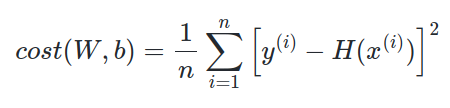

바로 이 비용 함수의 값을 최솟값으로 만드는 W와 b를 찾아내는 것이 가장 훈련 데이터를 잘 반영한 직선을 찾아내는 것입니다.

## 4. 옵티마이저 - 경사 하강법 (Gradient Descent)

비용 함수의 값을 최소로 하는 W와 b를 찾는 데 사용하는 것이 옵티마이저 (Optimizer) 알고리즘 또는 최적화 알고리즘이라고 부릅니다.

이 알고리즘으로 적절한 W와 b를 찾는 과정을 학습 (training) 이라고 부릅니다.

이 중 가장 기본적인 옵티마이저 알고리즘인 경사 하강법 (Gradient Descent) 입니다.

W와 cost의 관계는 다음과 같습니다.
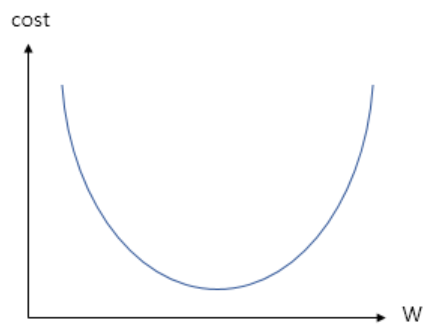

학습에서 cost가 최소가 되는 W를 찾아야 하므로, 아래로 볼록한 부분의 W 값을 찾아야 합니다. 이때 초기 W 값을 정하고, 미분을 통해 접선의 기울기가 낮은 방향으로 W의 값을 변경하는 작업을 반복합니다.

이때 사용되는 식이 다음과 같습니다.

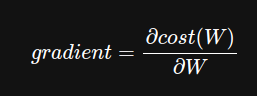

** 편미분 알아보기

편미분(Partial Derivative)은 여러 변수로 이루어진 함수에서 특정 변수에 대한 변화율을 구하는 수학적 개념입니다. 다변수 함수에서 특정 하나의 변수에 대해서만 미분하는 것입니다.

편미분 기호 : ∂

따라서 위 접선의 기울기(gradient)를 나타내는 식은 손실함수 cost(W)가 W에 대해 어떻게 변하는지 나타내는 것입니다.

기울기가 음수일 때와 양수일 때 W의 변화가 달라집니다.

기울기가 음수일 때는 W의 값이 증가하고, 양수일 때는 W의 값을 감소시키면서 기울기가 0인 방향으로 조정합니다.

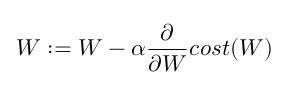

여기서 학습률 (learning rate) 라고 하는 𝛼는 W의 값을 얼마나 크게 변경할지를 결정합니다.

이 𝛼가 너무 크면 cost의 값이 발산할 위험이 있고, 너무 작으면 학습 속도가 너무 느리기 때문에 적절한 𝛼의 값을 찾아야 합니다.

현재 b는 고려하지 않고 있지만, 실제 경사 하강법에서는 W와 b에 대해 동시 경사 하강법을 수행하면서 둘 다 최적의 값을 찾습니다.

## 5. 파이토치로 선형 회귀 구현하기

### 1) 기본 셋팅

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

### 2) 변수 선언

In [4]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [5]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


### 3) 가중치와 편향의 초기화

In [6]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True)
# 가중치 W를 출력
print(W)

tensor([0.], requires_grad=True)


In [7]:
# 편향 b를 0으로 초기화하고, 학습을 통해 값이 변경되는 변수임을 명시함.
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


### 4) 가설 세우기

파이토치 코드에서 직선의 방정식에 해당되는 가설을 선언합니다.

H(x) = Wx + b

In [8]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


### 5) 비용 함수 선언하기

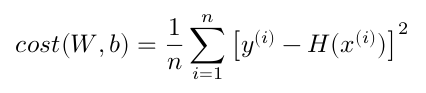

In [9]:
# 앞서 배운 torch.mean으로 평균을 구한다.
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


### 6) 경사 하강법 구현하기

In [10]:
# SGD는 경사하강법의 일종
# lr : 학습률
optimizer = optim.SGD([W,b], lr=0.01)

zero_grad()를 실행하며 기울기를 0으로 초기화 합니다. 이후 backward() 함수를 호출하여 기울기가 계산됩니다.

그 다음 step() 함수를 호출하여 기울기에 학습률 0.01을 곱하여 빼줌으로서 업데이트합니다.

In [11]:
# gradient를 0으로 초기화
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산
cost.backward()
# W와 b를 업데이트
optimizer.step()

### 7) 전체 코드

In [16]:
# 데이터
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])
# 모델 초기화
W = torch.zeros(1,requires_grad=True)
b = torch.zeros(1,requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W,b],lr=0.01)

nb_epochs = 1999 # 원하는 만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = x_train * W + b

  # cost 계산
  cost = torch.mean((hypothesis - y_train) ** 2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), b.item(), cost.item()))
  if epoch == 1999:
    print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), b.item(), cost.item()))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

## 6. optimizer.zero_grad() 가 필요한 이유

In [13]:
import torch

w = torch.tensor(2.0,requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs+1):
  z = 2 * w
  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


torch는 미분할 때마다 미분값을 계속해서 누적시키기 때문에 항상 0으로 초기화하고 진행해야 합니다.

## 7. torch.manual_seed() 를 하는 이유

torch.manual_seed()는 다른 컴퓨터에서 실행시켜도 동일한 결과를 얻도록 해 줍니다. 이는 난수 발생 순서와 값을 **동일하게** 보장해 주기 때문입니다.

In [19]:
torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])


In [18]:
torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])


torch.manual_seed()의 랜덤 시드값이 같다면 한 번 정해진 난수 시퀀스를 계속해서 생성합니다. 또한 3 또는 5에 특정한 차이가 있는 것이 아니라 단지 값이 다르기 때문에 서로 다른 난수 시퀀스를 생성해 줍니다.

## 8. 자동 미분 (Autograd) 실습하기

임의로 $2w^2 + 5$ 라는 식을 세워서 미분해 보겠습니다.

In [26]:
# 값이 2인 스칼라 텐서 w를 선언
w = torch.tensor(2.0, requires_grad=True)
# 수식 정의
y = w**2
z = 2*y + 5
# 수식을 w에 대한 미분
z.backward()

print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0
